In [1]:
%matplotlib inline
import pandas as pd
from os import path
from urllib.request import urlretrieve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import Normalizer

Dataset: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

Similar thing: https://github.com/jkginfinite/Mushroom_Classification

Grafici: https://colab.research.google.com/github/datascienceunibo/dialab2024/blob/main/Preprocessing_con_pandas/Preprocessing_e_analisi_esplorativa.sol.ipynb

Onehot encoding: https://colab.research.google.com/github/datascienceunibo/dialab2024/blob/main/Regressione_con_Alberi/Regressione_con_Alberi.sol.ipynb

Obiettivo: classificare i funghi in velenosi o commestibili

Parlare della struttura e delle variabili contenute (magari menzionare che ho scelto questo invece che l'original e perche ha 3 valori continui). 

Nominare anche le cose spiegate nella descrizione e tutto.

In [2]:
dataset_url = "https://archive.ics.uci.edu/static/public/848/data.csv"
if not path.exists("mushrooms.csv"):
    urlretrieve(dataset_url, "mushrooms.csv")

mushrooms = pd.read_csv("mushrooms.csv")

mushrooms.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
mushrooms.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

Use boolean when possible

In [4]:
mushrooms.rename(columns={"class": "is-edible"}, inplace=True)

mushrooms["is-edible"] = mushrooms["is-edible"].map({"p": False, "e": True})
mushrooms["does-bruise-or-bleed"] = mushrooms["does-bruise-or-bleed"].map({"t": True, "f": False})

mushrooms.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is-edible             61069 non-null  bool   
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  bool   
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

encode categories as float and keep NaN values

In [5]:
category_columns = mushrooms.select_dtypes(include="object").columns

encoder = OrdinalEncoder()
mushrooms[category_columns] = encoder.fit_transform(mushrooms[category_columns])

mushrooms.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is-edible             61069 non-null  bool   
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  float64
 3   cap-surface           46949 non-null  float64
 4   cap-color             61069 non-null  float64
 5   does-bruise-or-bleed  61069 non-null  bool   
 6   gill-attachment       51185 non-null  float64
 7   gill-spacing          36006 non-null  float64
 8   gill-color            61069 non-null  float64
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   float64
 12  stem-surface          22945 non-null  float64
 13  stem-color            61069 non-null  float64
 14  veil-type             3177 non-null   float64
 15  veil-color         

Vediamo

In [6]:
mushrooms.head()

,is-edible,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,False,15.26,6.0,2.0,6.0,False,2.0,NaN,10.0,16.95,...,4.0,7.0,11.0,0.0,4.0,1.0,2.0,NaN,0.0,3.0
1,False,16.60,6.0,2.0,6.0,False,2.0,NaN,10.0,17.99,...,4.0,7.0,11.0,0.0,4.0,1.0,2.0,NaN,0.0,2.0
2,False,14.07,6.0,2.0,6.0,False,2.0,NaN,10.0,17.80,...,4.0,7.0,11.0,0.0,4.0,1.0,2.0,NaN,0.0,3.0
3,False,14.17,2.0,3.0,1.0,False,2.0,NaN,10.0,15.77,...,4.0,7.0,11.0,0.0,4.0,1.0,5.0,NaN,0.0,3.0
4,False,14.64,6.0,3.0,6.0,False,2.0,NaN,10.0,16.53,...,4.0,7.0,11.0,0.0,4.0,1.0,5.0,NaN,0.0,3.0


describe iniziale

In [7]:
mushrooms.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069.000000,61069.000000,46949.000000,61069.000000,51185.000000,36006.000000,61069.000000,61069.000000,61069.000000,9531.000000,22945.000000,61069.000000,3177.0,7413.000000,61069.000000,58598.000000,6354.000000,61069.000000,61069.000000
mean,6.733854,4.041641,5.483077,6.144541,2.517437,0.411765,7.338502,6.581538,12.149410,2.074074,4.485334,8.429072,0.0,3.641306,0.248555,1.468975,2.656437,0.623721,1.053300
std,5.264845,2.138630,3.277637,3.171077,2.184753,0.662046,3.186426,3.370017,10.035955,1.698147,2.035054,3.218516,0.0,1.045332,0.432179,1.495966,1.934103,1.265880,1.100575
min,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.480000,2.000000,2.000000,5.000000,1.000000,0.000000,5.000000,4.640000,5.210000,0.000000,3.000000,6.000000,0.0,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,5.860000,5.000000,7.000000,5.000000,2.000000,0.000000,7.000000,5.950000,10.190000,2.000000,5.000000,11.000000,0.0,4.000000,0.000000,1.000000,2.000000,0.000000,1.000000
75%,8.540000,6.000000,8.000000,10.000000,5.000000,1.000000,10.000000,7.740000,16.570000,4.000000,6.000000,11.000000,0.0,4.000000,0.000000,1.000000,3.000000,1.000000,2.000000
max,62.340000,6.000000,10.000000,11.000000,6.000000,2.000000,11.000000,33.920000,103.910000,4.000000,7.000000,12.000000,0.0,5.000000,1.000000,7.000000,6.000000,7.000000,3.000000


-----

Analisi esplorativa

In [8]:
mushrooms["is-edible"].value_counts()

is-edible
False    33888
True     27181
Name: count, dtype: int64

<Axes: ylabel='count'>

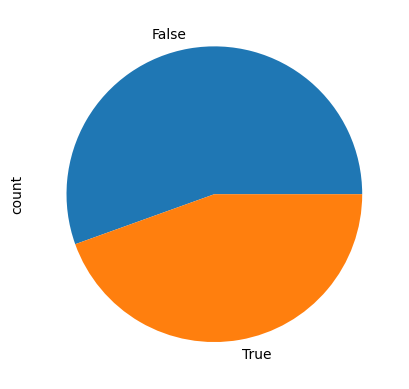

In [9]:
mushrooms["is-edible"].value_counts().plot.pie()

<Axes: ylabel='Frequency'>

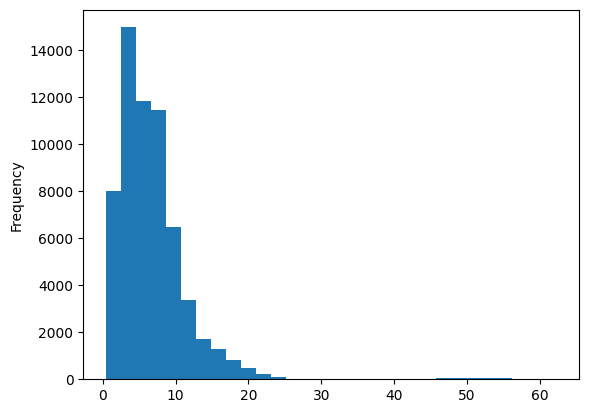

In [10]:
mushrooms["cap-diameter"].plot.hist(bins=30)

<Axes: xlabel='stem-height', ylabel='stem-width'>

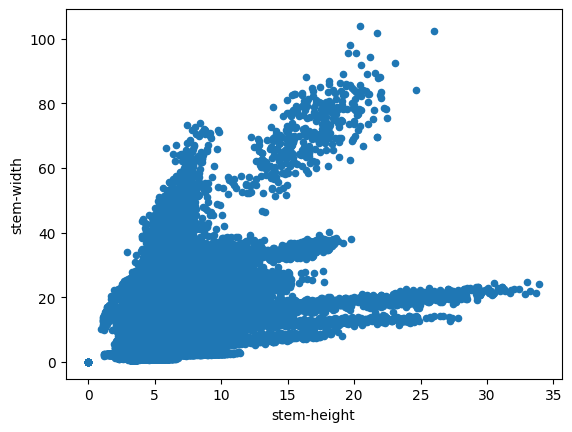

In [11]:
mushrooms.plot.scatter("stem-height", "stem-width")

In [12]:
class_color_map = {True: "blue", False: "red"}
class_colors = mushrooms["is-edible"].map(class_color_map)

<Axes: xlabel='stem-height', ylabel='stem-width'>

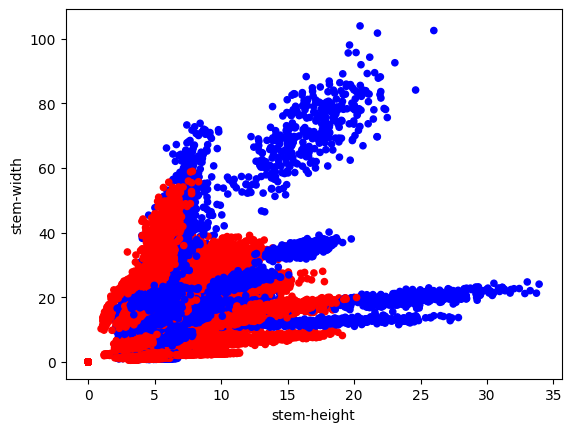

In [13]:
mushrooms.plot.scatter("stem-height", "stem-width", c=class_colors)

----

Controlliamo quanti valori NaN ci sono

In [14]:
def print_na_percentages(df):
    return df.isna().sum() / df.shape[0] * 100

In [15]:
print_na_percentages(mushrooms)

is-edible                0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64

Estraiamo le colonne che hanno piu' dell'80% di valori nulli nel dataset

In [16]:
columns_to_drop = [column for column in mushrooms.columns if mushrooms[column].isna().mean() > 0.80]
print(columns_to_drop)

['stem-root', 'veil-type', 'veil-color', 'spore-print-color']


Delete all rows that have NaN values in all of those columns

In [17]:
mushrooms.dropna(subset=columns_to_drop, how='all', inplace=True)

Check again if there a lot of NaN values

In [18]:
print_na_percentages(mushrooms)

is-edible                0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.076923
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         23.076923
gill-spacing            51.923077
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               48.076923
stem-surface            61.538462
stem-color               0.000000
veil-type               82.692308
veil-color              59.615385
has-ring                 0.000000
ring-type                7.692308
spore-print-color       65.384615
habitat                  0.000000
season                   0.000000
dtype: float64

We have cleaned up a lot. we now delete the veil-type feature

In [19]:
mushrooms.drop(columns="veil-type", inplace=True)

print_na_percentages(mushrooms)

is-edible                0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.076923
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         23.076923
gill-spacing            51.923077
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               48.076923
stem-surface            61.538462
stem-color               0.000000
veil-color              59.615385
has-ring                 0.000000
ring-type                7.692308
spore-print-color       65.384615
habitat                  0.000000
season                   0.000000
dtype: float64

Fill na values with mean

In [20]:
columns_to_fill = mushrooms.columns[mushrooms.isna().any()]

imputer = SimpleImputer(strategy="mean")
# imputer = KNNImputer()
mushrooms[columns_to_fill] = imputer.fit_transform(mushrooms[columns_to_fill])

print_na_percentages(mushrooms)

is-edible               0.0
cap-diameter            0.0
cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-spacing            0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-root               0.0
stem-surface            0.0
stem-color              0.0
veil-color              0.0
has-ring                0.0
ring-type               0.0
spore-print-color       0.0
habitat                 0.0
season                  0.0
dtype: float64

Check memory optimization

In [21]:
mushrooms.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 18356 entries, 0 to 58244
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is-edible             18356 non-null  bool   
 1   cap-diameter          18356 non-null  float64
 2   cap-shape             18356 non-null  float64
 3   cap-surface           18356 non-null  float64
 4   cap-color             18356 non-null  float64
 5   does-bruise-or-bleed  18356 non-null  bool   
 6   gill-attachment       18356 non-null  float64
 7   gill-spacing          18356 non-null  float64
 8   gill-color            18356 non-null  float64
 9   stem-height           18356 non-null  float64
 10  stem-width            18356 non-null  float64
 11  stem-root             18356 non-null  float64
 12  stem-surface          18356 non-null  float64
 13  stem-color            18356 non-null  float64
 14  veil-color            18356 non-null  float64
 15  has-ring              18

Check if there are columns with the same value for at least 99% of instances

In [22]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(mushrooms)

[column for column in mushrooms.columns if column not in sel.get_feature_names_out()]

[]

Normalize the data

In [23]:
float_columns = mushrooms.select_dtypes(include="float64").columns

normalizer = Normalizer(norm="l2")
mushrooms[float_columns] = normalizer.fit_transform(mushrooms[float_columns])

end result

In [24]:
mushrooms.to_csv("mushrooms_cleaned.csv", index=False)
mushrooms.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000,18356.000000
mean,0.276645,0.174110,0.236568,0.228206,0.123571,0.018651,0.301493,0.304672,0.454193,0.086282,0.162023,0.334076,0.155399,0.018086,0.083099,0.111703,0.023088,0.045196
std,0.098991,0.105205,0.130787,0.126330,0.090270,0.033424,0.125607,0.129185,0.219216,0.052238,0.075581,0.130663,0.060690,0.020850,0.080438,0.057883,0.043105,0.052163
min,0.024274,0.000000,0.000000,0.000000,0.000000,0.000000,0.021487,0.000000,0.000000,0.000000,0.000000,0.045043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.211462,0.085816,0.151200,0.142901,0.063245,0.000000,0.208060,0.234490,0.324738,0.066379,0.120580,0.235794,0.116500,0.000000,0.036908,0.078174,0.000000,0.000000
50%,0.277863,0.185476,0.236960,0.209778,0.101425,0.013001,0.307916,0.295264,0.477249,0.090434,0.148278,0.345513,0.146866,0.000000,0.058382,0.098765,0.000000,0.036471
75%,0.341813,0.240613,0.308781,0.317077,0.198133,0.020872,0.377959,0.372375,0.605640,0.120256,0.205624,0.413767,0.185259,0.036085,0.094658,0.126466,0.043583,0.082302
max,0.604092,0.525572,0.643977,0.721806,0.392867,0.200359,0.681928,0.710359,0.976109,0.210582,0.448207,0.685185,0.364784,0.091997,0.409427,0.386080,0.233965,0.287085
